In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import re
import cv2

In [2]:
df = pd.read_csv('tracking.txt', sep = '\t')

In [3]:
X_centers = df[df.id == 0]['xBody'].values
y_centers = df[df.id == 0]['yBody'].values
img_numbers = df[df.id == 0]['imageNumber'].values

In [4]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            g = np.asarray(img)
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45].astype(np.uint8)
            data.append(im)
            
data = np.array(data)

In [5]:

for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('data2/frame' + str(n) + '.jpg')

In [6]:
#save data composed of 442 images of shape 90,90 into a mp4 file with 20 fps
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write(data[i])
out.release()





# No background

In [5]:
background = np.array(PIL.Image.open('background.pgm').convert('L'))
#a = np.asarray(img)

In [18]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            #if (c >100):
            #    break
            g = np.asarray(img).astype(np.int16) - background.astype(np.int16)
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45]
            data.append(im)
            
data = np.array(data)

In [19]:
for i in range(len(data)):
    data[i] = (data[i] - np.min(data[i]))/(np.max(data[i]) - np.min(data[i]))*255

In [30]:
data = data.astype(np.uint8)

In [32]:
for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('nobackground/frame' + str(n) + '.jpg')

In [33]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_nobackground.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write((data[i]))
out.release()

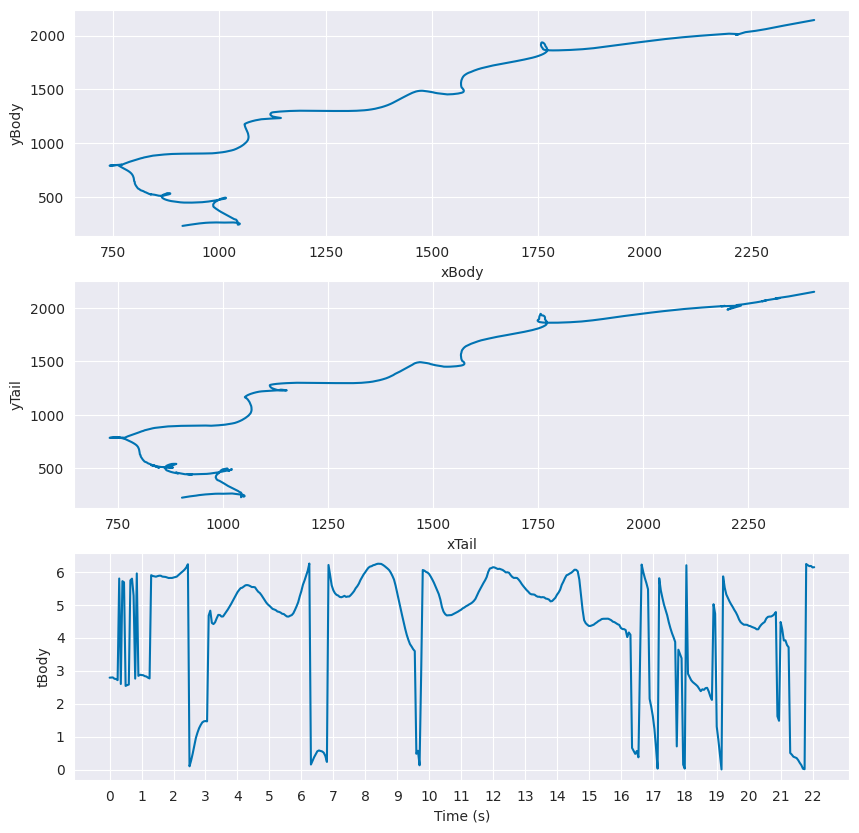

In [34]:
import seaborn
import pandas as pd
import numpy as np

data = pd.read_csv('tracking.txt', sep = '\t')
#get values in which id = 0
X_tail = data[data.id == 0]['xTail'].values
y_tail = data[data.id == 0]['yTail'].values
X_body = data[data.id == 0]['xBody'].values
y_body = data[data.id == 0]['yBody'].values
y_orientation = data[data.id == 0]['tBody'].values


r = np.arange(0, len(y_body)/20, 1/20)
seaborn.set_style('darkgrid')
seaborn.set_palette('colorblind')
ax, fig = plt.subplots(3,1, figsize = (10,10))
fig[0].plot(X_body, y_body)
fig[0].set_xlabel('xBody')
fig[0].set_ylabel('yBody')
fig[1].plot(X_tail, y_tail)
fig[1].set_xlabel('xTail')
fig[1].set_ylabel('yTail')
fig[2].plot(r, y_orientation)
fig[2].set_xlabel('Time (s)')
fig[2].set_ylabel('tBody')
fig[2].set_xticks(np.arange(0, len(y_body)/20, 1))
plt.show()


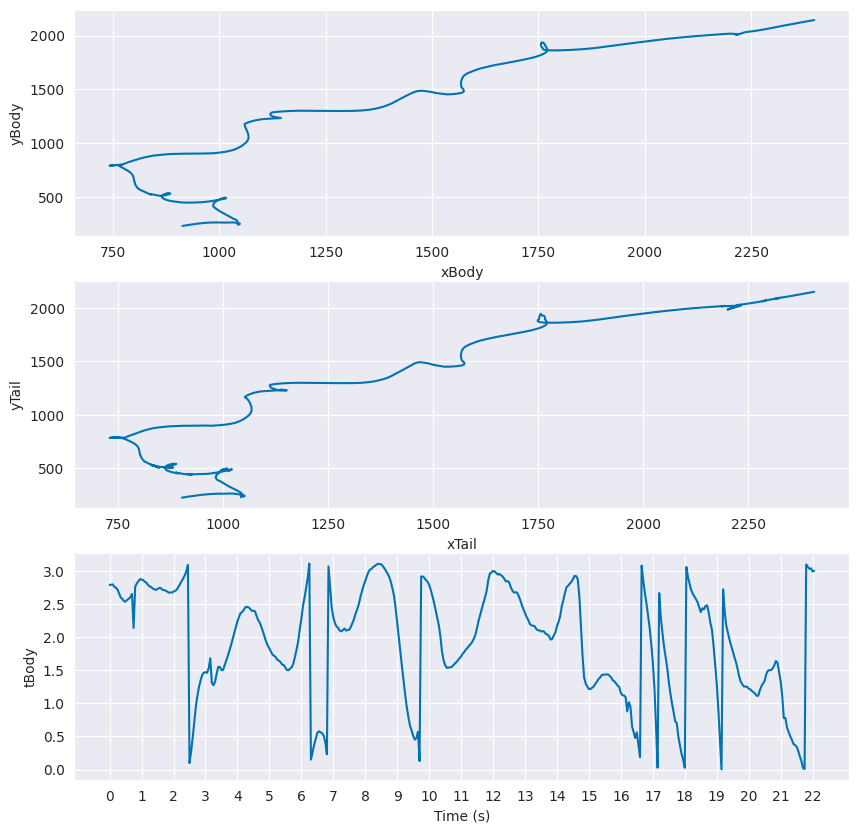

In [35]:
#use np.unwrap to plot the tBody
r = np.arange(0, len(y_body)/20, 1/20)
seaborn.set_style('darkgrid')
seaborn.set_palette('colorblind')
ax, fig = plt.subplots(3,1, figsize = (10,10))
fig[0].plot(X_body, y_body)
fig[0].set_xlabel('xBody')
fig[0].set_ylabel('yBody')
fig[1].plot(X_tail, y_tail)
fig[1].set_xlabel('xTail')
fig[1].set_ylabel('yTail')
fig[2].plot(r, np.unwrap(y_orientation %np.pi, np.pi))
fig[2].set_xlabel('Time (s)')
fig[2].set_ylabel('tBody')
fig[2].set_xticks(np.arange(0, len(y_body)/20, 1))
plt.show()